# FERM 501 Applied Financial Economics I - HW II

In [24]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Q1-) Using “US_Industry_Portfolios.csv” data, Fama-French 3 factor monthly returns, run the following regression foreach sector portfolio i.
# $$ R_i - R_f = \alpha + \beta_1 (R_M - R_f) + \beta_2SMB + \beta_3HML + e_i $$ 
## You can download the Fama-French factors for US Stocks from the following website:
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
## Compute the alphas, factor betas and R2 for each sector portfolio. Discuss your observations.

In [2]:
Alldata = pd.read_csv("finaldata.csv")
Alldata.head()

,Date,Mkt-RF,SMB,HML,RF,MOM,Agric,Food,Soda,Beer,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,196907,-7.00,-3.24,1.20,0.53,1.71,-8.85,-7.45,-4.06,-2.63,...,-3.68,-13.03,-10.62,-8.72,-10.46,-7.13,-10.71,-13.27,-9.58,-15.17
1,196908,4.68,0.93,-3.79,0.50,2.17,3.73,4.02,4.94,6.13,...,5.58,5.09,5.88,7.71,8.48,12.26,8.30,14.56,8.39,7.88
2,196909,-2.98,1.18,-3.27,0.62,2.52,0.97,-1.20,4.66,-1.53,...,0.61,-2.18,-0.41,-1.37,-1.97,-3.56,6.46,-4.41,-3.16,-7.29
3,196910,5.06,3.91,-3.16,0.60,-4.31,16.35,7.37,6.24,11.04,...,2.90,4.29,10.65,5.65,8.43,10.11,5.11,3.94,9.71,3.10
4,196911,-3.79,-2.58,-1.19,0.52,3.66,-2.39,-1.18,-5.43,-3.35,...,-2.50,-8.43,-7.35,-4.60,-2.42,-9.51,-5.42,-6.75,-6.43,-2.77


In [3]:
industrynames=Alldata.columns[6:57]

In [4]:
results_df = pd.DataFrame(columns=['Industry', 'Constant', 'Constant-P', 'Mkt-RF', 'Mkt-RF-P','SMB','SMB-P','HML','HML-P','R-squared'])

In [5]:
for industry in industrynames:
    # Extract the independent variables (four factors) and the dependent variable (industry return)
    X = Alldata[['Mkt-RF', 'SMB', 'HML',]]
    y = Alldata[industry]

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()
  
    # Store the results in a dictionary
    result_dict = {
        'Industry': industry,
        'Constant': model.params[0],
        'Constant-P': model.pvalues[0],
        'Mkt-RF': model.params[1],
        'Mkt-RF-P': model.pvalues[1],
        'SMB': model.params[2],
        'SMB-P': model.pvalues[2],
        'HML': model.params[3],
        'HML-P': model.pvalues[3],
        'R-squared': model.rsquared
    }

    # Append the results to the results DataFrame
    results_df = pd.concat([results_df, pd.DataFrame.from_dict([result_dict])], ignore_index=True)

In [6]:
results_df

,Industry,Constant,Constant-P,Mkt-RF,Mkt-RF-P,SMB,SMB-P,HML,HML-P,R-squared
0,Agric,0.087709,0.659200,0.801549,4.010284e-58,0.355258,1.520849e-07,0.133128,4.145053e-02,0.398420
1,Food,0.227924,0.073495,0.713307,5.044429e-96,-0.194043,6.919842e-06,0.160629,1.276628e-04,0.487370
2,Soda,0.206293,0.320000,0.855253,2.709280e-60,-0.193880,5.624506e-03,0.186168,6.314211e-03,0.341115
3,Beer,0.302584,0.052948,0.763939,1.399020e-78,-0.196079,2.066856e-04,0.047911,3.493331e-01,0.425567
4,Smoke,0.534042,0.011745,0.735576,9.604623e-46,-0.313464,1.234872e-05,0.225458,1.195365e-03,0.266913
5,Toys,-0.394498,0.040475,1.114675,1.076176e-100,0.461714,2.558270e-12,0.127461,4.342629e-02,0.576186
6,Fun,0.137411,0.471872,1.291759,2.824947e-124,0.384616,3.580855e-09,0.055163,3.783183e-01,0.637301
7,Books,-0.217748,0.100565,1.084475,5.675302e-158,0.242957,7.158716e-08,0.299862,1.167907e-11,0.704118
8,Hshld,0.048623,0.687920,0.799148,2.446787e-120,-0.207769,4.452096e-07,-0.026840,4.988239e-01,0.580064
9,Clths,-0.098625,0.550032,1.106940,6.112432e-123,0.311435,3.010203e-08,0.303966,2.789920e-08,0.622285


### COMMENT: First of all, Constant-P, Mkt-RF-P, SMB-P and HML-P represent the p-values of the relevant coefficients
### The regression results reveal distinct factor sensitivities across various industries, illustrating diverse risk profiles. Notably, the "Mkt-RF" betas suggest that some sectors are more influenced by overall market trends, indicating cyclical characteristics. Variations in "SMB" and "HML" betas across industries highlight differences in size and value orientations, respectively. Industries with significant alphas suggest that there are specific industry factors or managerial skills contributing to returns beyond what the Fama-French three-factor model explains. This underscores the need for considering individual industry risk profiles in investment decisions and portfolio management.

## Q2-) Add the monthly momentum factor which is also available from Kenneth French’s website. Do your results change? Is a four-factor model more suitable at capturing the fluctuation in sector portfolio returns? Discuss your observations.
# # $$ R_i - R_f = \alpha + \beta_1 (R_M - R_f) + \beta_2SMB + \beta_3HML + \beta_4WML + e_i $$  

In [7]:
Alldata['MktRF']=Alldata['Mkt-RF']

In [8]:
model = smf.ols("Smoke ~ MktRF+SMB+HML+MOM", data=Alldata)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Smoke   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     59.18
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.29e-42
Time:                        10:12:48   Log-Likelihood:                -2023.5
No. Observations:                 655   AIC:                             4057.
Df Residuals:                     650   BIC:                             4079.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5420      0.215      2.516      0.0

In [9]:
results2_df = pd.DataFrame(columns=['Industry', 'Constant', 'Constant-P', 'Mkt-RF', 'Mkt-RF-P','SMB','SMB-P','HML','HML-P', 'MOM','MOM-P', 'R-squared'])

In [10]:
for industry in industrynames:
    # Extract the independent variables (four factors) and the dependent variable (industry return)
    X = Alldata[['Mkt-RF', 'SMB', 'HML','MOM']]
    y = Alldata[industry]

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Store the results in a dictionary
    result_dict = {
        'Industry': industry,
        'Constant': model.params[0],
        'Constant-P': model.pvalues[0],
        'Mkt-RF': model.params[1],
        'Mkt-RF-P': model.pvalues[1],
        'SMB': model.params[2],
        'SMB-P': model.pvalues[2],
        'HML': model.params[3],
        'HML-P': model.pvalues[3],
        'MOM':model.params[4],
        'MOM-P': model.pvalues[4],
        'R-squared': model.rsquared
    }
   

    # Append the results to the results DataFrame
    results2_df = pd.concat([results2_df, pd.DataFrame.from_dict([result_dict])], ignore_index=True)

In [11]:
results2_df

,Industry,Constant,Constant-P,Mkt-RF,Mkt-RF-P,SMB,SMB-P,HML,HML-P,MOM,MOM-P,R-squared
0,Agric,0.023939,0.905800,0.818689,8.401408e-58,0.361034,9.640304e-08,0.160063,1.729839e-02,0.078461,9.787929e-02,0.400952
1,Food,0.211325,0.103364,0.717768,2.880407e-93,-0.192539,8.429554e-06,0.167640,1.058273e-04,0.020422,5.009493e-01,0.487728
2,Soda,0.270091,0.200756,0.838106,4.186630e-56,-0.199659,4.366545e-03,0.159221,2.316013e-02,-0.078495,1.123036e-01,0.343668
3,Beer,0.234472,0.139454,0.782246,1.125942e-78,-0.189909,3.164557e-04,0.076680,1.450875e-01,0.083803,2.419889e-02,0.430043
4,Smoke,0.541974,0.012120,0.733444,1.481734e-43,-0.314182,1.230481e-05,0.222107,1.964618e-03,-0.009760,8.465990e-01,0.266955
5,Toys,-0.261045,0.178777,1.078805,8.135218e-94,0.449625,6.204316e-12,0.071093,2.695078e-01,-0.164197,3.213282e-04,0.584547
6,Fun,0.312824,0.102295,1.244612,8.339644e-117,0.368727,8.894613e-09,-0.018928,7.654449e-01,-0.215824,1.768679e-06,0.649829
7,Books,-0.152259,0.257339,1.066873,8.200021e-151,0.237025,1.340159e-07,0.272201,1.712281e-09,-0.080575,1.060032e-02,0.707078
8,Hshld,0.034546,0.779440,0.802932,7.445812e-117,-0.206494,5.472050e-07,-0.020894,6.096196e-01,0.017320,5.486796e-01,0.580297
9,Clths,0.064461,0.695674,1.063105,1.834420e-115,0.296663,7.490262e-08,0.235082,1.946975e-05,-0.200657,2.616544e-07,0.637394


### COMMENT: Addition of momentum factor to the Fama-French model analysis introduces a new dimention to understanding the behaviour of industry portfolio's returns, where the results show varied sensitivities to the momentum factor across different industries.
### Notably, the momentum factor is statistically significant for a few industries like 'Clths', 'Banks' and 'Autos', suggesting that past performance trends can be relevant for future returns in these areas. 
### However, for many industries such as "MedEq", "Coal" and "Gold" etc., the momentum factor isn't significantly predictive(high "MOM-P" values), implying that other factors might be more influential in driving returns. Overall, the impact of adding momentum to the model is modest, with market, size, and value factors remaining dominant in explaining industry returns. This suggests the need for a nuanced, sector-specific approach in investment strategy and portfolio management.

## Q3-) Apply a Principal Components Analysis to Industry Portfolio Returns and create a factor model using first 4 principal components (Fj) such as:
# $$ R_i - R_f = \alpha_i + \sum_{j=1}^{4} \beta_{ij} F_j + \varepsilon_i $$
### Compare your results with question 2 and comment on it.
### $ F_j $ = set of 4 common factors (principal components
### $ \varepsilon_i $ = the noise terms associated with each sector return
### $ \beta_{ij} $'s are the factor loadings or factor sensitivities, which express the influence of the j-th factor on the i -th sector. 

### Notes:
### SMB: Return of small cap stocks over large cap (Small minus big)
### HML: Return of high book-to-marketstocks over low book-to-market(High minus low)
### WML: Return on stocks with high past returns over stocks with low past returns (Winner minus loser) 

In [12]:
X_PCA = Alldata[6:57].dropna()
scaler = StandardScaler(with_std=True , with_mean=True)
X_scaled = scaler.fit_transform(X_PCA)
pd.DataFrame(X_scaled).describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,...,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000
mean,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,...,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010
min,-1.382,-2.823,-1.873,-2.344,-1.585,-2.656,-2.436,-2.808,-3.098,-3.279,...,-2.049,-2.644,-3.042,-3.547,-2.679,-2.443,-2.551,-2.107,-2.581,-2.823
25%,-0.565,-0.601,-0.594,-0.635,-0.748,-0.428,-0.555,-0.475,-0.621,-0.508,...,-0.715,-0.689,-0.718,-0.599,-0.475,-0.698,-0.872,-0.598,-0.554,-0.601
50%,0.253,0.007,-0.231,0.052,-0.070,0.141,-0.104,-0.076,0.107,-0.163,...,-0.038,-0.012,-0.065,0.133,0.003,-0.068,-0.018,0.056,0.103,0.007
75%,1.070,0.838,0.532,0.665,0.807,0.564,0.572,0.494,0.657,0.559,...,0.821,0.560,0.927,0.644,0.573,0.878,0.871,0.831,0.742,0.838
max,1.888,2.005,2.723,1.970,2.002,2.074,2.257,1.929,2.811,2.922,...,2.071,2.151,1.965,1.958,2.743,1.972,1.852,1.618,1.976,2.005


In [13]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [14]:
print(pca.components_.round(4))

[[ 0.0167 -0.1652 -0.112  ... -0.1578 -0.1246 -0.1652]
 [ 0.0759  0.0408 -0.1673 ...  0.0719 -0.009   0.0408]
 [ 0.244  -0.1055  0.3679 ... -0.0745  0.1334 -0.1055]
 ...
 [-0.0724 -0.0479  0.1544 ...  0.2999 -0.0687 -0.0479]
 [-0.0803  0.1289  0.1496 ... -0.1388 -0.0117  0.1289]
 [-0.0204  0.5399 -0.1133 ...  0.3896  0.0636  0.1258]]


In [15]:
PrComp=pca.transform(X_scaled)

pd.DataFrame(PrComp).shape

(51, 51)

In [16]:
np.corrcoef(X_PCA.iloc[:,0].values,pca.transform(X_scaled)[:,0])

array([[1.        , 0.09909394],
       [0.09909394, 1.        ]])

In [17]:
PCs=pd.DataFrame(X_scaled.dot(pca.components_.T))
PCs

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,8.194117,-0.123896,2.452748,-1.092888,1.088964,-1.250835,0.667400,-0.668595,-0.479620,0.318892,...,0.135062,0.027031,0.104598,0.009084,0.016482,0.026111,-0.004492,-0.014774,0.019307,2.098379e-15
1,-5.770863,3.448613,-1.817306,-0.706750,-0.107852,-1.187332,-0.956552,1.473292,-1.787852,0.626426,...,-0.065726,0.089194,-0.063002,0.021961,0.048627,0.022370,0.029877,-0.009719,0.009379,1.709225e-15
2,1.999565,1.864307,-0.363590,-1.984245,0.460160,-0.334717,0.834120,-0.060848,0.891277,-0.013195,...,0.119587,-0.080087,-0.178604,0.149654,0.121749,-0.023806,0.016065,-0.021606,0.037956,1.613672e-15
3,14.411401,0.840202,0.134896,-3.400929,0.525140,-0.232460,-0.324106,1.375708,0.782607,-0.857770,...,0.011129,-0.018944,-0.063466,0.011936,0.066692,-0.038853,-0.079749,0.030386,-0.037761,2.361734e-15
4,9.732424,1.319387,0.188972,-1.658160,1.563900,-0.526755,2.108056,0.491030,-0.113981,-2.184191,...,-0.225508,0.199267,0.068760,-0.110704,0.016546,0.083181,0.019485,0.016746,0.001603,2.069569e-15
5,6.742598,-0.820724,-0.058891,-0.386548,2.811935,-2.330511,-1.879596,-0.530054,0.398676,0.008560,...,-0.080881,-0.169066,0.142255,0.016357,-0.067259,-0.030029,-0.019894,-0.020123,-0.040787,1.766162e-15
6,-7.226668,2.436336,-2.026764,-1.585024,0.248994,0.184595,0.357284,-1.738086,1.216672,0.619926,...,-0.129189,0.060907,-0.044008,0.000071,0.012933,-0.117863,0.003257,-0.025969,-0.018707,2.291299e-15
7,-5.218198,0.565348,0.455231,-0.831377,-0.525415,1.066798,1.488183,-1.688691,1.996727,-0.058087,...,0.085274,-0.043922,0.185346,0.013558,-0.108372,-0.016417,0.061365,0.007262,0.001722,2.476341e-15
8,-8.722567,-3.160617,3.425771,1.035050,0.826069,-2.796528,2.066124,0.908442,-1.101922,1.395779,...,-0.055749,-0.043892,-0.075716,-0.094875,-0.019918,-0.021713,-0.019659,-0.017181,-0.014089,3.156047e-15
9,4.466508,-0.988516,-2.586657,0.010849,2.971606,-0.790229,-1.078282,-0.497893,0.359721,-0.469922,...,0.205427,0.037600,-0.020744,-0.129189,-0.065892,-0.013683,-0.050656,-0.058436,0.083940,2.171077e-15


In [18]:
Var_PCS=PCs.var(axis=0)
Rel_Var=Var_PCS/Var_PCS.sum()
Rel_CumVar=Var_PCS.cumsum()/Var_PCS.sum()

In [19]:
explainedVar = PCs.var(axis=0)/PCs.var(axis=0).sum()
print(explainedVar.head(10))

AttributeError: 'DataFrame' object has no attribute 'explained_variance_ratio_'

In [28]:
# The explained variances for the components will be as follows:

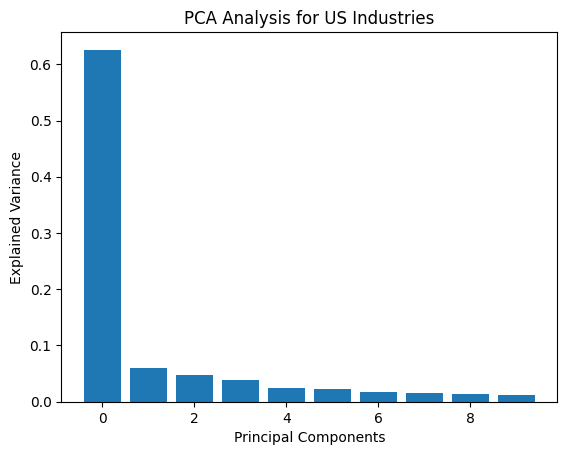

In [29]:
plt.bar(range(10),explainedVar.head(10))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('PCA Analysis for US Industries')

# Display the plot
plt.show()

### COMMENT:  Principal Components Analysis (PCA) is applied to the industry portfolio returns to extract common factors that explain the variance in returns across industries. With the PCA, it's observed that the first principal component explains a significant proportion of the variance (around 62.6%), indicating that it captures a large part of the common variation across the industry portfolios. The second, third, and fourth components explain an additional 6%, 4.8%, and 3.8%, respectively. This suggests that most of the common risk across the industries can be largely captured by the first component, with the subsequent components adding progressively less explanatory power.
### So, when we compare the results of PCA with the results from Q2, we observe that PCA model differs from Fama-French model with momentum in some key aspects. The first principal component accounts for a substantial portion of the variance in the data, suggesting that PCA could offer a compact yet powerful description of common movements across industries. However, unlike the Fama-French model, PCA does not provide an economic explanation for these movements. Also, while the Fama-French factors have specific financial interpretations, the principal components derived from PCA are linear combinations of all variables and lack direct economic meaning.
### In summary, the PCA approach may yield a more parsimonious model potentially capturing more variance with fewer factors, but at the cost of losing the economic interpretability provided by the Fama-French factors.

In [22]:
# Alldata shows excess returns, so no need to substract RF here
industry_names = Alldata.columns[6:57]
X_PCA = Alldata[industry_names].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_PCA)

# Perform PCA
pca = PCA(n_components=4)  # We want only the first 4 components
X_pca = pca.fit_transform(X_scaled)

# The regression will now be run using the principal components as independent variables
# and the (already excess) returns as the dependent variable
results_list = []

for industry in industry_names:
    y_industry = Alldata[industry]  # No need to subtract RF, as it's already excess returns
    
    # Add a constant to the independent variables
    X_factors = sm.add_constant(X_pca)
    
    # Fit the regression model
    model = sm.OLS(y_industry, X_factors).fit()
    
    # Create a dictionary of results and append to the list
    results_list.append({
        'Industry': industry,
        'Alpha': model.params[0],
        'Beta_F1': model.params[1],
        'Beta_F2': model.params[2],
        'Beta_F3': model.params[3],
        'Beta_F4': model.params[4],
        'Alpha_P': model.pvalues[0],
        'Beta_F1_P': model.pvalues[1],
        'Beta_F2_P': model.pvalues[2],
        'Beta_F3_P': model.pvalues[3],
        'Beta_F4_P': model.pvalues[4],
        'R-squared': model.rsquared
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)
results_df

,Industry,Alpha,Beta_F1,Beta_F2,Beta_F3,Beta_F4,Alpha_P,Beta_F1_P,Beta_F2_P,Beta_F3_P,Beta_F4_P,R-squared
0,Agric,0.621420,-0.766294,0.251078,0.619231,-0.439799,9.993434e-04,4.721451e-82,4.688665e-02,2.182889e-05,7.506294e-03,0.446882
1,Food,0.663954,-0.578055,-1.408830,0.677892,-0.141573,3.258212e-14,1.198747e-161,1.090398e-94,4.199669e-23,5.824348e-02,0.761427
2,Soda,0.731160,-0.723036,-1.617854,0.336270,0.254312,2.824188e-05,7.073921e-85,1.070253e-38,1.204023e-02,9.315253e-02,0.526067
3,Beer,0.736427,-0.635331,-1.591780,0.428570,-0.410277,2.939318e-10,1.108431e-125,4.111505e-73,1.648477e-06,4.885473e-05,0.679113
4,Smoke,0.988977,-0.574681,-1.506561,1.540584,-0.868699,8.185574e-09,6.516179e-62,1.029025e-35,2.607648e-29,6.498664e-09,0.516302
5,Toys,0.328565,-1.076171,0.119323,-0.751679,0.603433,5.551305e-02,4.709267e-148,2.994122e-01,1.843783e-08,6.020044e-05,0.653793
6,Fun,0.934855,-1.185239,0.145322,-1.312466,0.144262,4.837760e-08,1.669081e-168,2.010926e-01,3.027649e-22,3.289875e-01,0.706713
7,Books,0.513878,-0.963291,-0.124357,-0.410414,0.728818,1.128638e-05,2.547438e-203,1.108627e-01,5.357271e-06,1.729255e-12,0.766043
8,Hshld,0.480931,-0.665119,-1.150496,-0.029346,-0.405354,3.583165e-07,1.339841e-171,7.217099e-61,6.838282e-01,8.612940e-07,0.742105
9,Clths,0.653863,-1.021454,-0.242848,-0.730991,1.242924,9.404330e-07,1.449998e-188,6.285755e-03,1.831524e-12,4.452753e-25,0.750988


### COMMENT: The Alpha values show varied results between industries. In some cases, such as 'Smoke', 'Hlth', 'Banks' and 'Other', it's noticably higher than others, meaning that returns of these sectors are not fully explained by the first four principal components. 
### Beta coefficients show considerable variations, such as 'Agric' and 'Food' industries having notably high negative values on the first principal component, which might be capturing market-wide movements or another common source of risk.
### P-values for alpha and beta coefficients vary significantly. For 'Food', 'Beer', and 'Drugs' industries, both alpha and the first principal component have statistically significant p-values, suggesting that these are important in explaining the variation in returns for these sectors.
### The R-squared values are relatively high in many industries (e.g., 'BldMt', 'Books', 'Chems'), indicating that the first four principal components are capturing a substantial part of the variability in the returns.